# the goal of this project is to predict basen on some paramater if the patient is a diabetic or no 

### Import libraries


In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import plotly.express as px

### load the data

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

In [4]:
data = pd.concat([train_data, test_data])

### data understanding 

In [5]:
data.head()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
0,316,2,112,68,22,94,34.1,0.315,26,0.0
1,25,11,143,94,33,146,36.6,0.254,51,1.0
2,710,2,93,64,32,160,38.0,0.674,23,1.0
3,658,1,120,80,48,200,38.9,1.162,41,0.0
4,542,3,128,72,25,190,32.4,0.549,27,1.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 153
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   768 non-null    int64  
 1   no_times_pregnant      768 non-null    int64  
 2   glucose_concentration  768 non-null    int64  
 3   blood_pressure         768 non-null    int64  
 4   skin_fold_thickness    768 non-null    int64  
 5   serum_insulin          768 non-null    int64  
 6   bmi                    768 non-null    float64
 7   diabetes pedigree      768 non-null    float64
 8   age                    768 non-null    int64  
 9   diabetes               614 non-null    float64
dtypes: float64(3), int64(7)
memory usage: 66.0 KB


In [7]:
data.isnull().sum()

p_id                       0
no_times_pregnant          0
glucose_concentration      0
blood_pressure             0
skin_fold_thickness        0
serum_insulin              0
bmi                        0
diabetes pedigree          0
age                        0
diabetes                 154
dtype: int64

<b>we have no missing values in the dataset</b>

In [8]:
data.describe()

,p_id,no_times_pregnant,glucose_concentration,blood_pressure,skin_fold_thickness,serum_insulin,bmi,diabetes pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,614.000000
mean,384.500000,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348534
std,221.846794,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476895
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,192.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,384.500000,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,576.250000,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,768.000000,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
diabet_copy = data[['no_times_pregnant', 'glucose_concentration','blood_pressure',
      'skin_fold_thickness','serum_insulin','bmi','diabetes pedigree', 'age', 'diabetes']]

array([[<AxesSubplot:title={'center':'no_times_pregnant'}>,
        <AxesSubplot:title={'center':'glucose_concentration'}>,
        <AxesSubplot:title={'center':'blood_pressure'}>],
       [<AxesSubplot:title={'center':'skin_fold_thickness'}>,
        <AxesSubplot:title={'center':'serum_insulin'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'diabetes pedigree'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'diabetes'}>]], dtype=object)

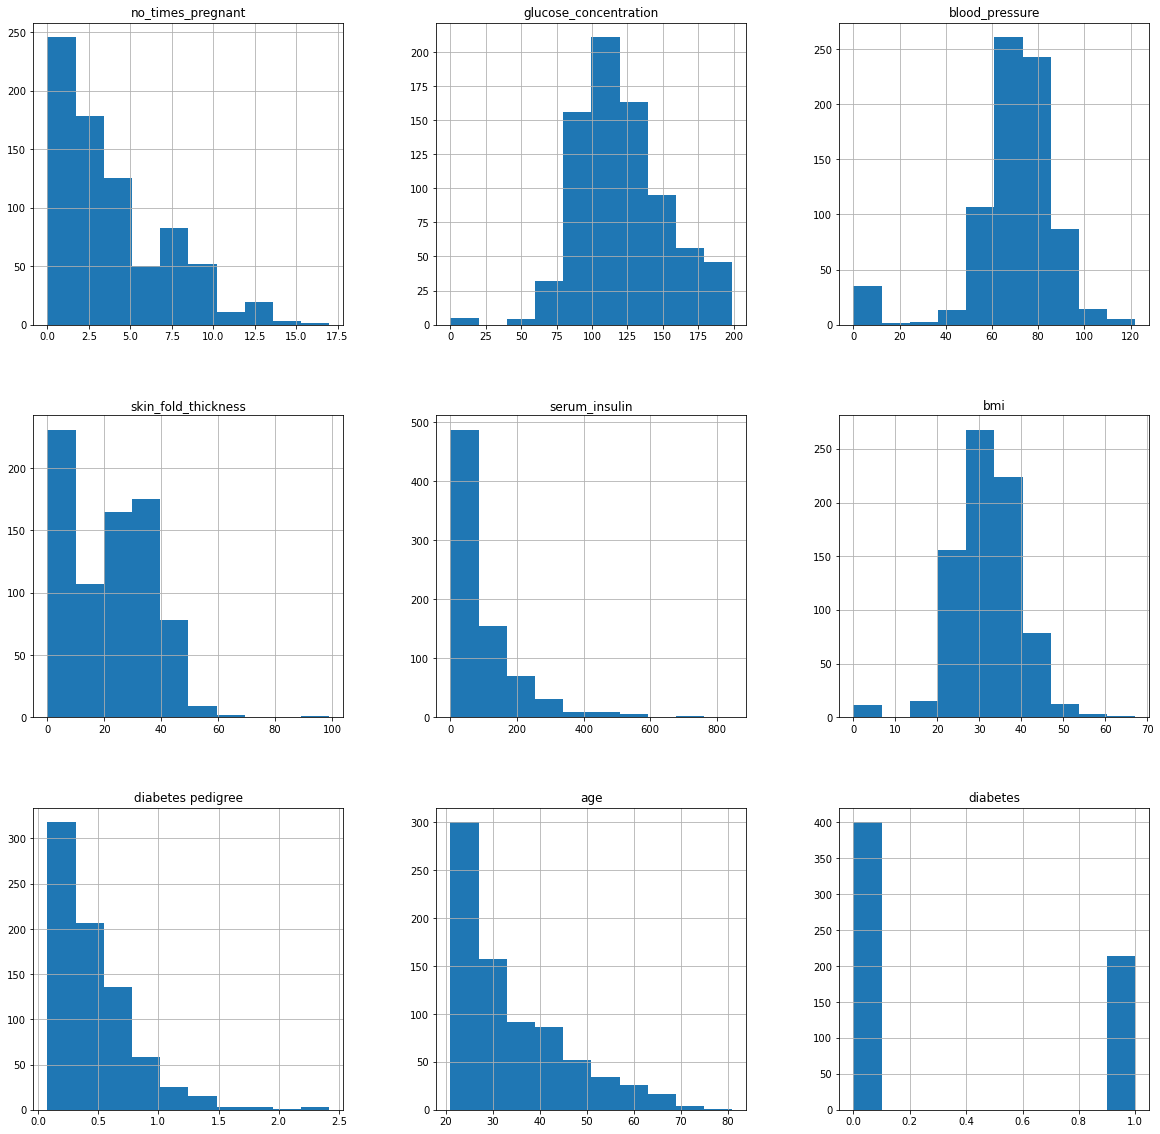

In [10]:
diabet_copy.hist(figsize = (20,20))

### data preprocessing

In [11]:
data['bmi']=data.bmi.astype(int)
data['diabetes pedigree'] = data['diabetes pedigree'].astype(int)

In [12]:
train_data['bmi']=train_data.bmi.astype(int)
train_data['diabetes pedigree'] = train_data['diabetes pedigree'].astype(int)

In [13]:
test_data['bmi']=test_data.bmi.astype(int)
test_data['diabetes pedigree'] = test_data['diabetes pedigree'].astype(int)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 153
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   p_id                   768 non-null    int64  
 1   no_times_pregnant      768 non-null    int64  
 2   glucose_concentration  768 non-null    int64  
 3   blood_pressure         768 non-null    int64  
 4   skin_fold_thickness    768 non-null    int64  
 5   serum_insulin          768 non-null    int64  
 6   bmi                    768 non-null    int32  
 7   diabetes pedigree      768 non-null    int32  
 8   age                    768 non-null    int64  
 9   diabetes               614 non-null    float64
dtypes: float64(1), int32(2), int64(7)
memory usage: 60.0 KB


#### using stander scaler in the data

In [15]:
x = data.drop(columns = 'diabetes', axis=1)
y= data['diabetes']

In [16]:
x = train_data.drop(columns =['p_id', 'diabetes'], axis=1)
y= train_data['diabetes']
test_data = test_data.drop(columns = 'p_id', axis = 1)

In [17]:
scaler = StandardScaler()
scaler.fit(x)
scaler_data = scaler.transform(x)

In [18]:
x = scaler_data
y = train_data['diabetes']

array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>],
       [<AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>],
       [<AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>, <AxesSubplot:>]], dtype=object)

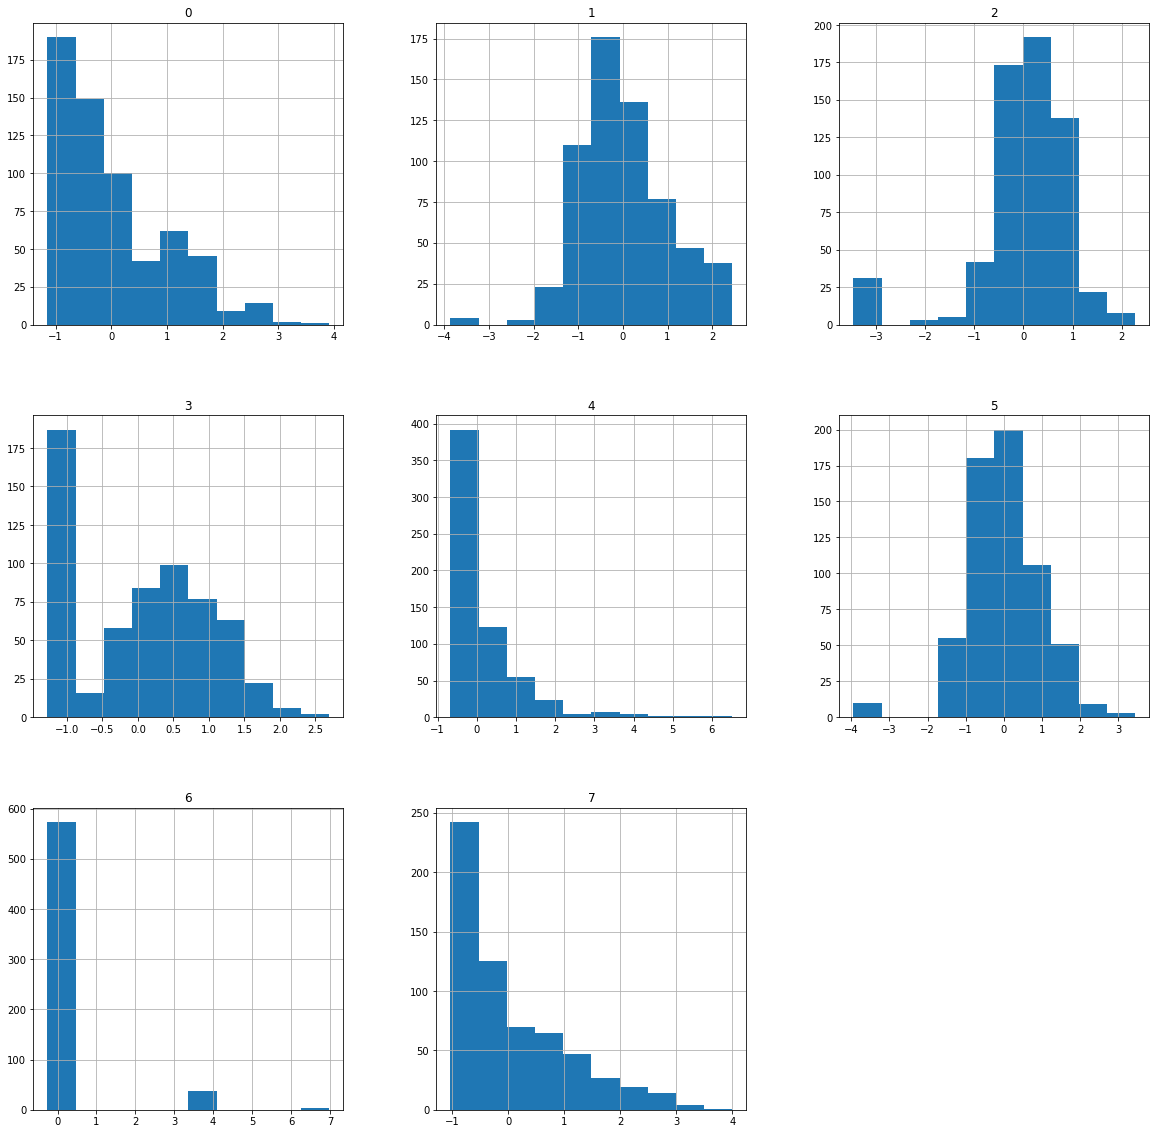

In [19]:
df = pd.DataFrame(scaler_data)
df.hist(figsize = (20,20))

### split the data into train and test split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 2)

#### verificataion of the shape

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((491, 8), (123, 8), (491,), (123,))

### model creation DecisionTreeClassifier

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [23]:
model = svm.SVC(kernel= 'linear')

#### model training

In [24]:
model.fit(X_train, y_train)

SVC(kernel='linear')

#### model accuracy

In [25]:
training_data_accuracy = model.predict(X_train)
training_data_accuracy = accuracy_score(training_data_accuracy, y_train)
print(training_data_accuracy)

0.7881873727087576


In [26]:
y_train.shape

(491,)

In [27]:
x_test_prediction = model.predict(X_test)

In [28]:
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)

In [29]:
training_data_accuracy, testing_data_accuracy

(0.7881873727087576, 0.7479674796747967)

confusion matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model.predict(X_test))
cm

array([[69, 11],
       [20, 23]], dtype=int64)

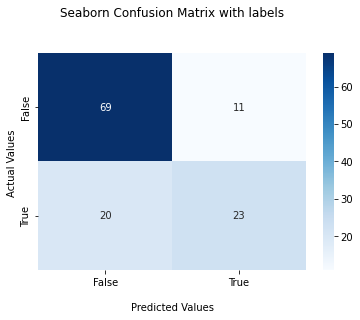

In [31]:
import seaborn as sns

ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### logistic regression model

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
model1 = LogisticRegression(random_state =0)
model1.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [34]:
x_test_prediction = model1.predict(X_test)

In [35]:
training_data_predicted = model1.predict(X_train)
training_data_accuracy = accuracy_score(training_data_predicted, y_train)
print(training_data_accuracy)

0.7759674134419552


In [36]:
testing_data_accuracy = accuracy_score(x_test_prediction, y_test)


In [37]:
testing_data_accuracy

0.7804878048780488

In [38]:
cm = confusion_matrix(y_test, model1.predict(X_test))
cm

array([[71,  9],
       [18, 25]], dtype=int64)

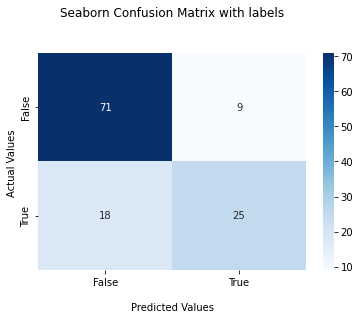

In [39]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### logistic regression model  is better for this classifier 

In [40]:
# sample_submission = pd.read_csv('sample_submission.csv')
# sample_submission['diabetes']= model.predict(test_data)
# sample_submission[sample_submission.diabetes == 0]
# sample_submission.to_csv('sample_submissionn.csv')
